# Patient Diabetes Readmission Predictions and insights

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import MultiLabelBinarizer
import warnings 
warnings.filterwarnings('ignore')


In [2]:
# Upload the data 
df= pd.read_csv('/Users/marlandhamilton/Downloads/diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
missing = df.isnull().sum()
print(missing)

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
df[df['medical_specialty'] == 'InternalMedicine']

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
46,486156,86240259,Caucasian,Female,[70-80),?,3,5,4,9,...,No,Down,No,No,No,No,No,Ch,Yes,<30
122,2091690,7919802,AfricanAmerican,Female,[40-50),?,6,25,7,6,...,No,No,No,No,No,No,No,No,No,NO
125,2095932,276606,AfricanAmerican,Female,[30-40),?,6,25,7,8,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
132,2262036,427482,Caucasian,Female,[60-70),?,6,25,7,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101678,442641206,141498050,Caucasian,Female,[70-80),?,3,14,1,4,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101690,443127950,36620667,Caucasian,Male,[50-60),?,2,1,1,1,...,No,No,No,No,No,No,No,No,No,NO
101706,443196674,75664143,Caucasian,Male,[70-80),?,1,1,7,3,...,No,No,No,No,No,No,No,Ch,Yes,>30
101719,443256548,162949523,Caucasian,Male,[10-20),?,1,7,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [8]:
df['max_glu_serum'].fillna('No Test', inplace = True)
df['A1Cresult'].fillna('No Test', inplace = True)
df['race'].replace('?', 'Unknown', inplace= True)
df['weight'].replace('?', 'Unknown', inplace = True)
df['payer_code'].replace('?', 'Unknown', inplace = True)
df['medical_specialty'].replace('?', 'Unknown', inplace = True)

In [9]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),Unknown,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),Unknown,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),Unknown,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),Unknown,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),Unknown,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [10]:
df.to_csv('diabetes_cleaned_data.csv', index = False) # save our cleaned dataset

# Distribution by Race 

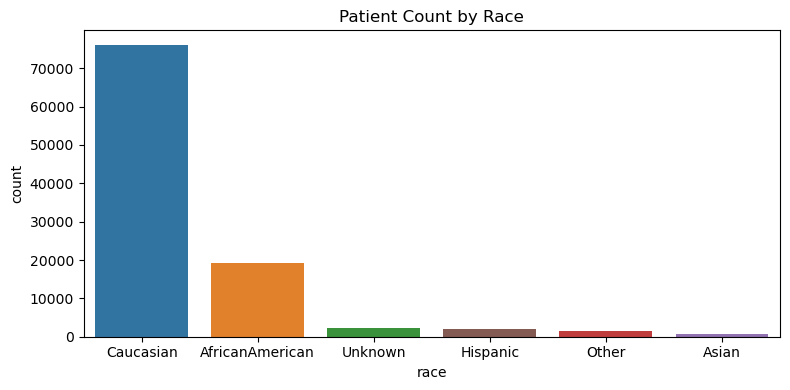

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x='race', hue='race', data=df, order=df['race'].value_counts().index)
plt.title('Patient Count by Race')
plt.tight_layout()
plt.show()


# Readmission VS  A1C Results

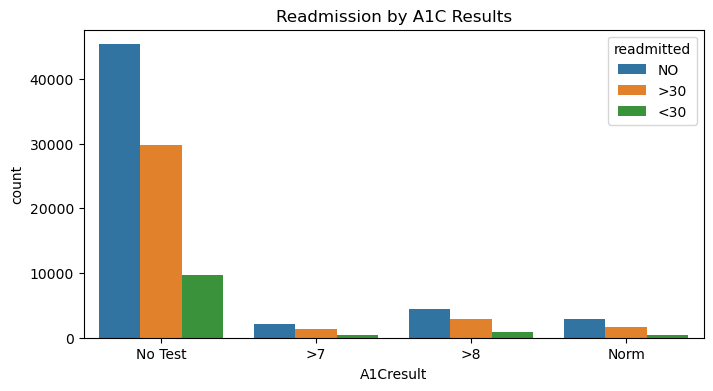

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(x='A1Cresult' , hue='readmitted', data=df)
plt.title('Readmission by A1C Results')
plt.show()

# Readmission VS Max Glucose Serum

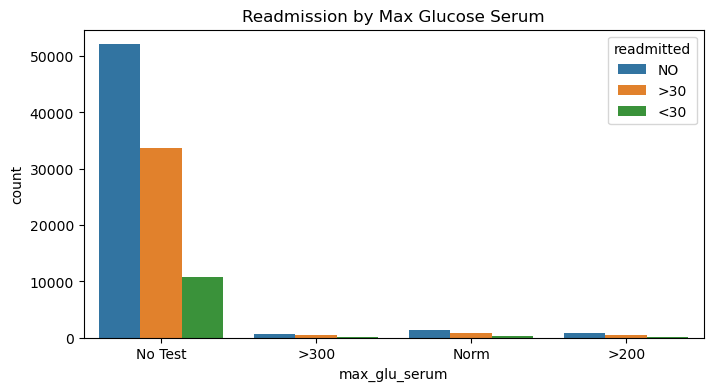

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(x='max_glu_serum', hue='readmitted', data=df)
plt.title('Readmission by Max Glucose Serum')
plt.show()

# Length of Stay Distribution

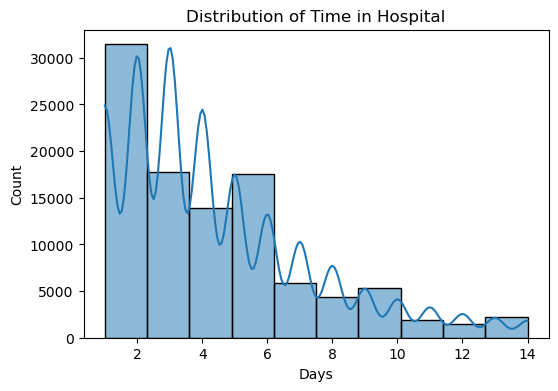

In [14]:

plt.figure(figsize=(6,4))
sns.histplot(df['time_in_hospital'], bins=10, kde=True)
plt.title('Distribution of Time in Hospital')
plt.xlabel('Days')
plt.show()

# Age vs Readmission 

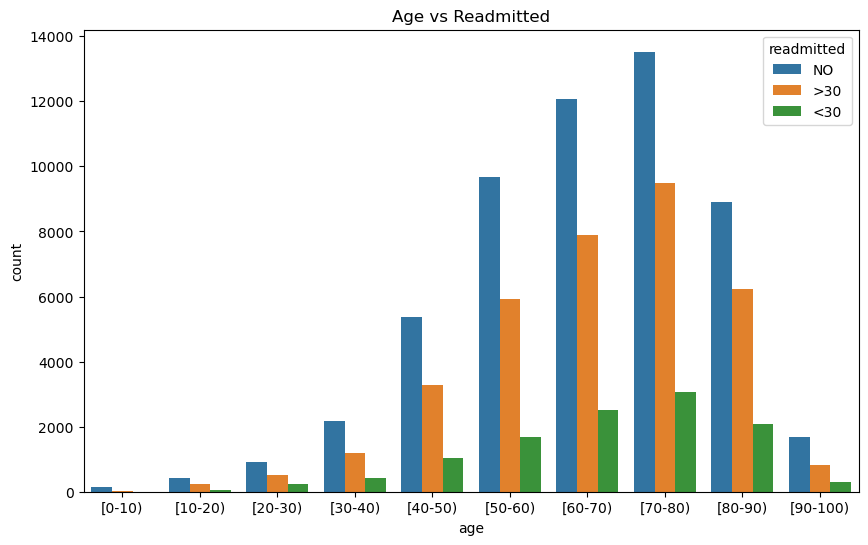

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='age', hue='readmitted')
plt.title('Age vs Readmitted')
plt.show()

# Selecting Features and the Target

In [16]:
features = [ 'race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'time_in_hospital', 'num_medications', 
            'number_outpatient','number_emergency', 'number_inpatient', 'medical_specialty']

In [17]:
# The target 
df['readmit_binary'] = df['readmitted'].apply(lambda x: 1 if x=='<30' else 0)

In [18]:
df_model = df[features+['readmit_binary']].copy()
df_model = pd.get_dummies(df_model, drop_first=True)

# Train-Test Split

In [19]:
X = df_model.drop('readmit_binary', axis=1)
y= df_model['readmit_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model= LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18026    43]
 [ 2255    30]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.41      0.01      0.03      2285

    accuracy                           0.89     20354
   macro avg       0.65      0.51      0.48     20354
weighted avg       0.84      0.89      0.84     20354



# Train Random Forest Classifier

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf =rf_model.predict(X_test)

In [23]:
# Evaluate the random forest

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[17659   410]
 [ 2206    79]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     18069
           1       0.16      0.03      0.06      2285

    accuracy                           0.87     20354
   macro avg       0.53      0.51      0.49     20354
weighted avg       0.81      0.87      0.83     20354



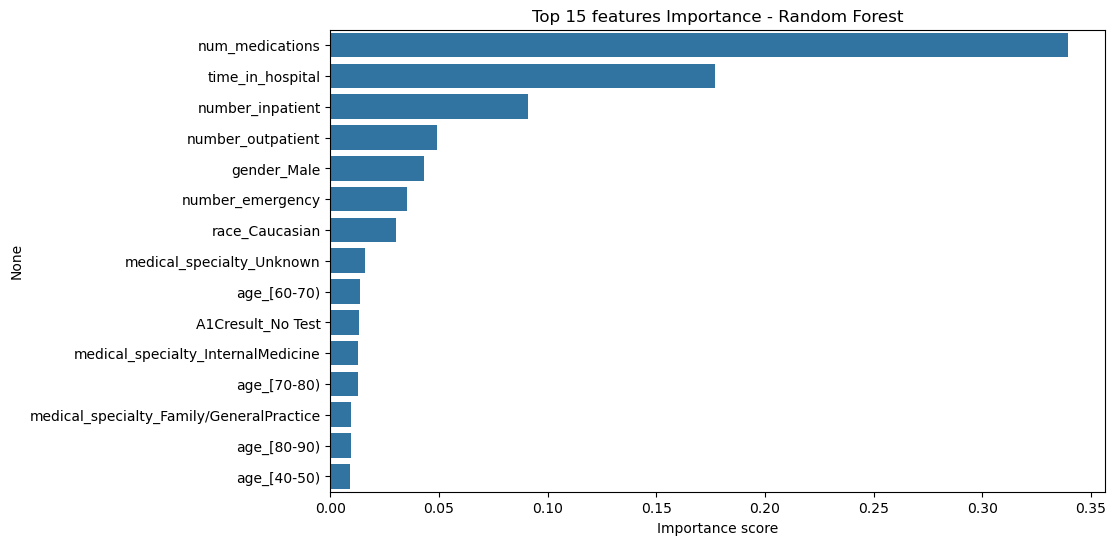

In [24]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title('Top 15 features Importance - Random Forest')
plt.xlabel('Importance score')
plt.show()


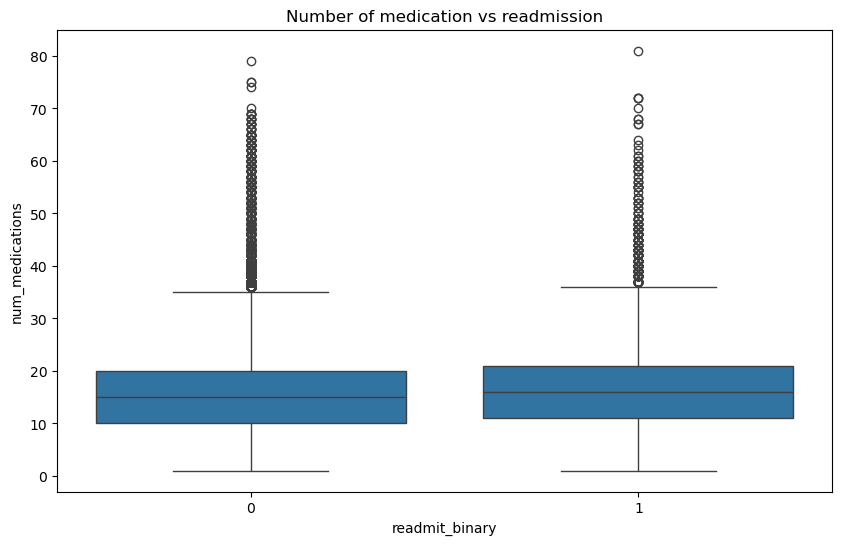

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x=y, y=X['num_medications'])
plt.title('Number of medication vs readmission')
plt.show()

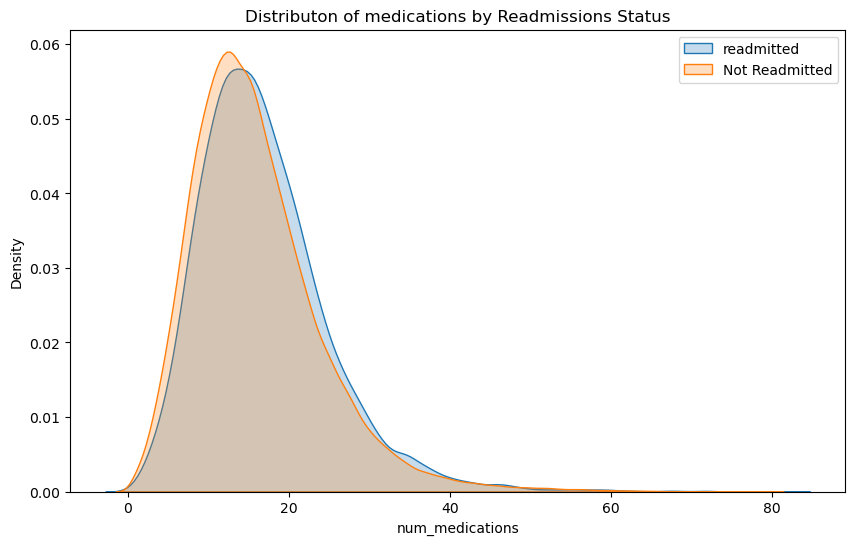

In [26]:
plt.figure(figsize=(10,6))
sns.kdeplot(X['num_medications'][y ==1], label= "readmitted", fill =True)
sns.kdeplot(X['num_medications'][y==0], label = "Not Readmitted", fill = True)
plt.title('Distributon of medications by Readmissions Status')
plt.legend()
plt.show()

# Train Another Model for Comparison

In [27]:
# Check for non-string column names
non_string_cols = [col for col in X.columns if not isinstance(col, str)]

# Check for invalid characters in column names
invalid_char_cols = [col for col in X.columns if any(char in str(col) for char in ['[', ']', '<', '>'])]

print("❗ Non-string column names:", non_string_cols)
print("🚫 Columns with invalid characters:", invalid_char_cols)


❗ Non-string column names: []
🚫 Columns with invalid characters: ['age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)', 'max_glu_serum_>300', 'A1Cresult_>8']


In [28]:
X.columns = X.columns.astype(str).str.replace(r"[\[\]<>]", "", regex=True)
# Clean your column names
X_train.columns = X_train.columns.astype(str).str.replace(r"[\[\]<>]", "", regex=True)
X_test.columns = X_test.columns.astype(str).str.replace(r"[\[\]<>]", "", regex=True)


In [29]:
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb= xgb_model.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


[[18025    44]
 [ 2259    26]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.37      0.01      0.02      2285

    accuracy                           0.89     20354
   macro avg       0.63      0.50      0.48     20354
weighted avg       0.83      0.89      0.84     20354



# Using Logistic regression 

In [31]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

In [32]:


print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


[[18025    44]
 [ 2259    26]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.37      0.01      0.02      2285

    accuracy                           0.89     20354
   macro avg       0.63      0.50      0.48     20354
weighted avg       0.83      0.89      0.84     20354



In [33]:


coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
})

# Sort by strength of effect
coeff_df['Abs_Coeff'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Abs_Coeff', ascending=False).drop(columns='Abs_Coeff')

print(coeff_df)
# Positive Coefficient = increase likehood of readmission
# Negative Coefficient = decrease likehood of readmission

                                       Feature  Coefficient
40                medical_specialty_Hematology     1.082903
63  medical_specialty_Pediatrics-Endocrinology    -1.028656
56            medical_specialty_Otolaryngology    -0.961510
41       medical_specialty_Hematology/Oncology     0.774333
46                 medical_specialty_Neurology    -0.681508
..                                         ...          ...
57          medical_specialty_OutreachServices    -0.006357
2                            number_outpatient    -0.004285
6                               race_Caucasian     0.004195
70         medical_specialty_PhysicianNotFound    -0.003617
68              medical_specialty_Perinatology     0.000000

[99 rows x 2 columns]


# Plotting logistic Regression Coefficients

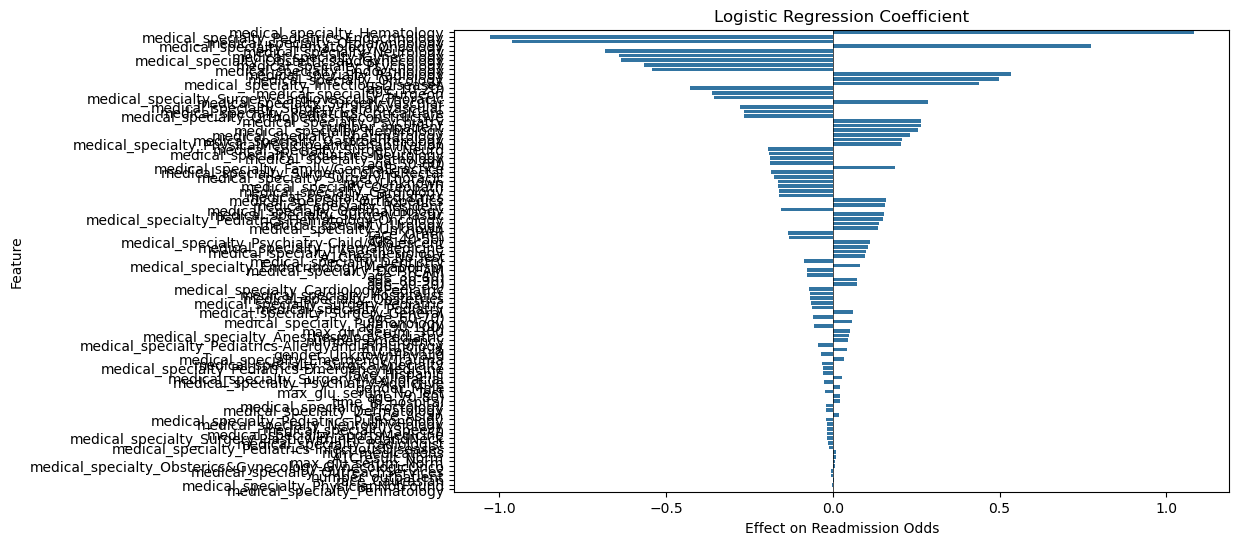

In [34]:
# lets create a dataframe with coefficients

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
})

#lets sort by absolute value pf coefficient for importance

coeff_df['abs_val'] = np.abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='abs_val', ascending=False).drop(columns='abs_val')


plt.figure(figsize=(10,6))
sns.barplot(data=coeff_df, x='Coefficient', y='Feature', fill='coolwarm')
plt.title('Logistic Regression Coefficient')
plt.xlabel('Effect on Readmission Odds')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=0.5)
plt.show()
    

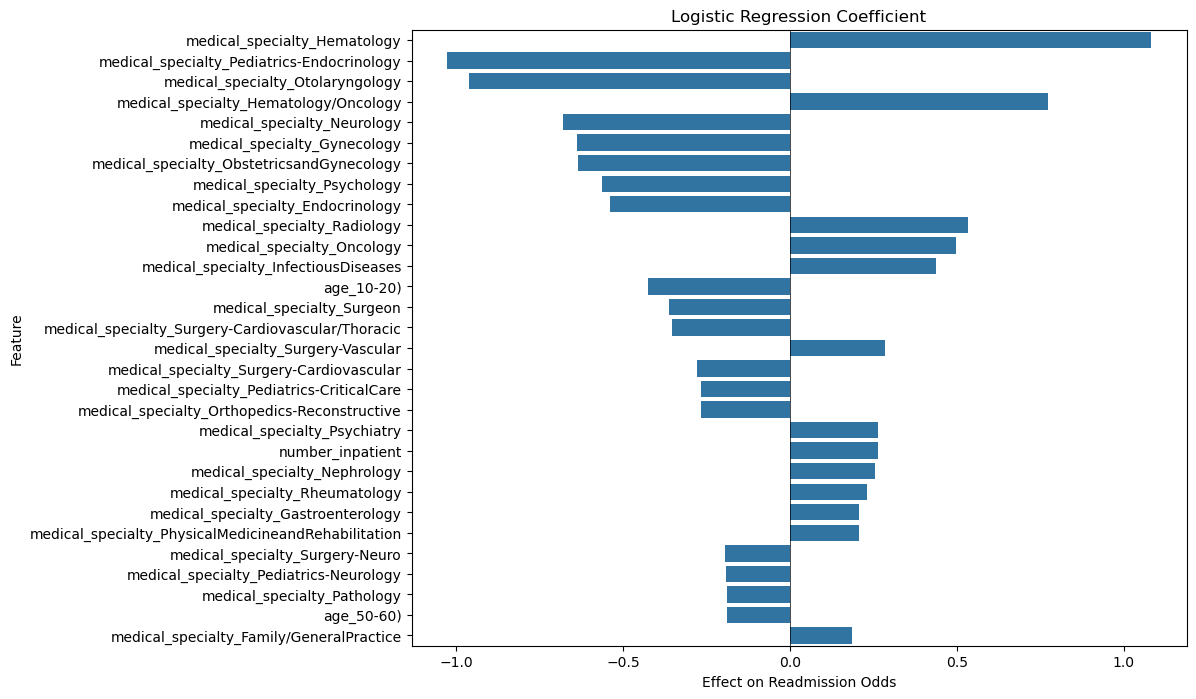

In [35]:
# Lets clean up the the chart above.

#sort the absolute values of coefficents
coeff_df['abs_val'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='abs_val', ascending=False). drop(columns='abs_val')

top_n =30
coeff_top = coeff_df.head(top_n)

plt.figure(figsize=(10,8))
sns.barplot(data=coeff_top, x='Coefficient', y = 'Feature', fill='coolwarmn')
plt.title('Logistic Regression Coefficient')
plt.xlabel('Effect on Readmission Odds')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


In [36]:
# exploring the diag_1, 2, and 3 
df['diag_1'].value_counts().head(10)

diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
427    2766
491    2275
715    2151
682    2042
434    2028
Name: count, dtype: int64

In [37]:
df['diag_1'].head(3)

0    250.83
1       276
2       648
Name: diag_1, dtype: object

<Axes: xlabel='readmitted', ylabel='num_lab_procedures'>

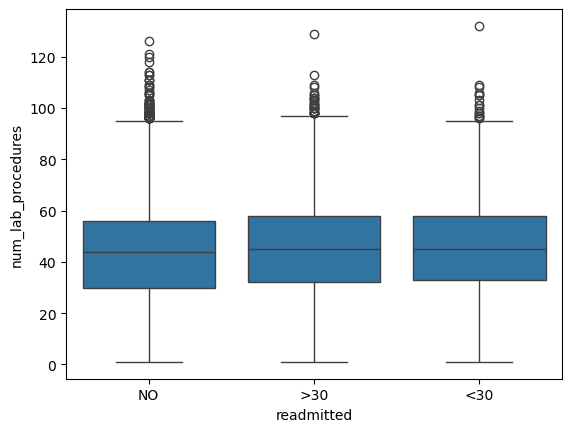

In [38]:
sns.boxplot(x='readmitted', y='num_lab_procedures', data = df)

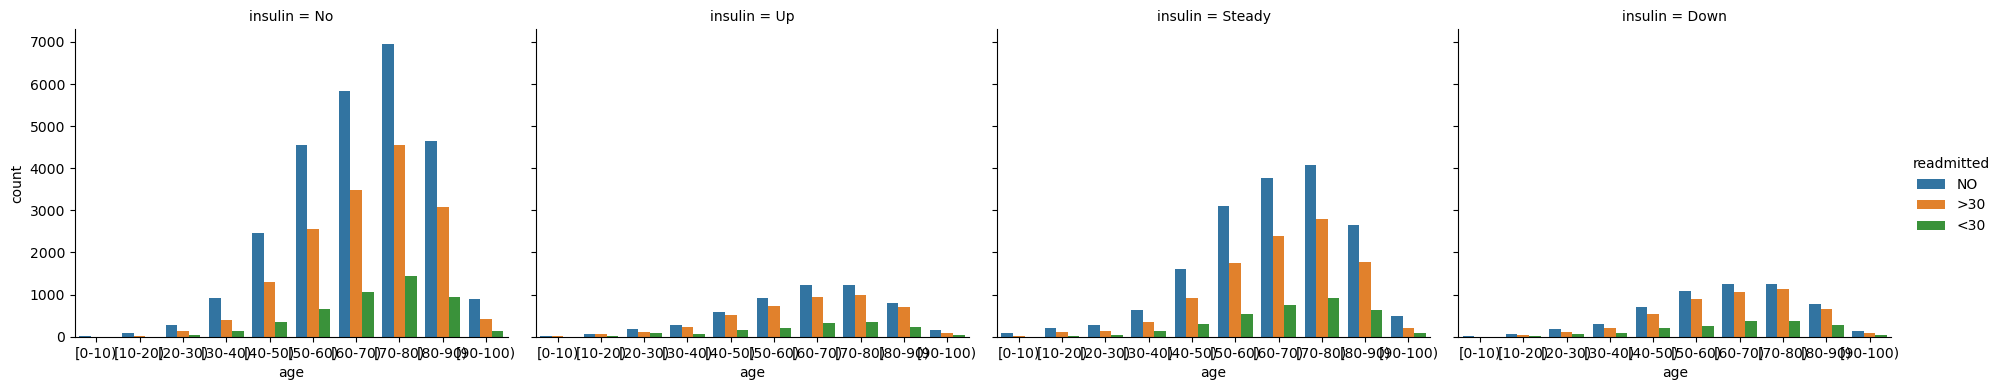

In [39]:
sns.catplot(data= df, x='age', hue='readmitted', col='insulin', kind='count', height=4, aspect=1.2)

# Create a new column called diag category 

In [40]:
# lets convert diag_1 to numeric
def convert_diag(code):
    try:
        return float(code)
    except:
        return np.nan
df['diag_1'] = df['diag_1'].apply(convert_diag)

In [41]:
# create the diagnosis_category

def categorize_diag(code):
    if pd.isnull(code):
        return 'Unknown'
    elif code == 250:
        return 'Diabetes'
    elif 390 <= code <= 459 or code == 785:
        return 'Circulatory'
    elif 460 <= code <= 519 or code == 786:
        return 'Respiratory'
    elif 520 <= code <= 579 or code == 787:
        return 'Disgestive'
    elif 580 <= code <= 629 or code == 780:
        return 'Genitourinary'
    elif 800 <= code <= 999:
        return 'Injury'
    elif 140 <= code <= 239:
        return 'Neoplasm'
    else:
        return 'Other'

df['diagnosis_category'] = df['diag_1'].apply(categorize_diag) 


# Readmission by Category using diag_1 

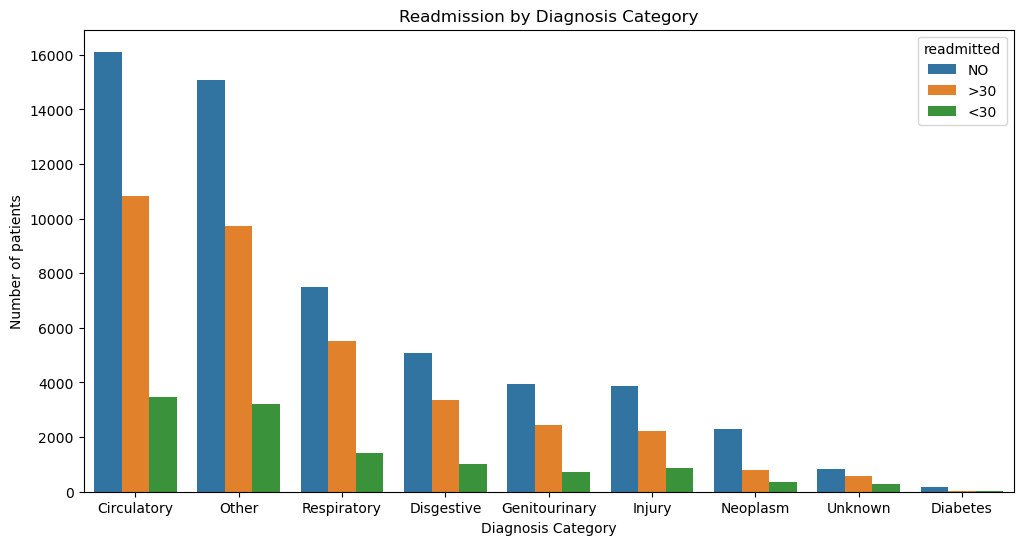

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x = 'diagnosis_category', hue = 'readmitted', order = df['diagnosis_category'].value_counts().index)
plt.title('Readmission by Diagnosis Category')
plt.xlabel('Diagnosis Category')
plt.ylabel('Number of patients')
plt.show()


# Adding diag_2 and Diag_3 

In [43]:
df['diag_2_num'] = df['diag_2'].apply(convert_diag)
df['diag_3_num'] = df['diag_3'].apply(convert_diag)

In [44]:
df['diag_2_category'] = df['diag_2_num'].apply(categorize_diag)
df['diag_3_category'] = df['diag_3_num'].apply(categorize_diag)

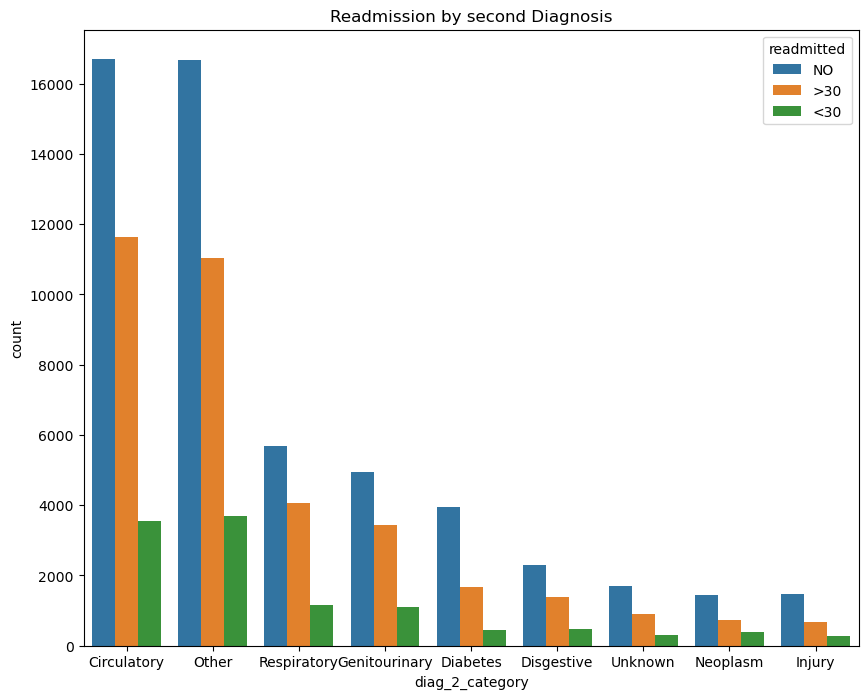

In [45]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='diag_2_category', hue = 'readmitted', order=df['diag_2_category'].value_counts().index)
plt.title('Readmission by second Diagnosis')
plt.show()

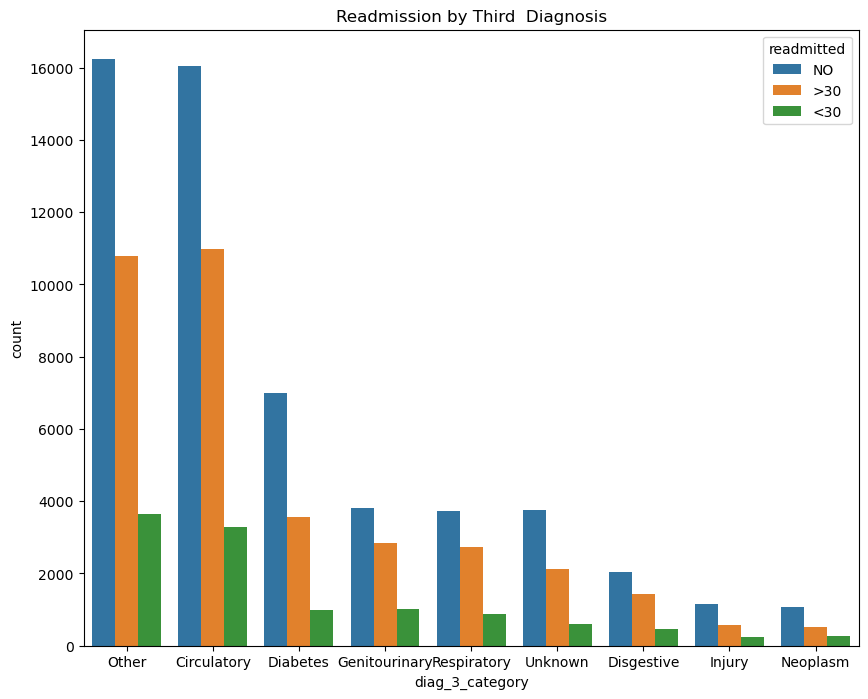

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='diag_3_category', hue = 'readmitted', order=df['diag_3_category'].value_counts().index)
plt.title('Readmission by Third  Diagnosis')
plt.show()

##  Lets find out which medical specailty did not test for A1Cresults and max glucose 

In [47]:
alc_missing = df[df['A1Cresult'].isin(['No Test'])] # shows No Test for 
glu_missing = df[df['max_glu_serum'].isin(['No Test'])] # shows No test for max 

# count by medical specialty
alc_by_specialty = alc_missing['medical_specialty'].value_counts()
glu_by_specialty = glu_missing['medical_specialty'].value_counts()

In [48]:
total_patients_by_specialty = df['medical_specialty'].value_counts()
print(total_patients_by_specialty)

medical_specialty
Unknown                          49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: count, Length: 73, dtype: int64


## lets compare % rather than just raw counts 

In [49]:
# total patients by medicaln specialty
total_patients_by_specialty = df['medical_specialty'].value_counts() 

alc_test_gap = (alc_by_specialty / total_patients_by_specialty).sort_values(ascending=False)
glu_test_gap = (glu_by_specialty / total_patients_by_specialty).sort_values(ascending=False)

<Axes: title={'center': 'Top 10 Medical Specialty missing A1C Test'}, ylabel='medical_specialty'>

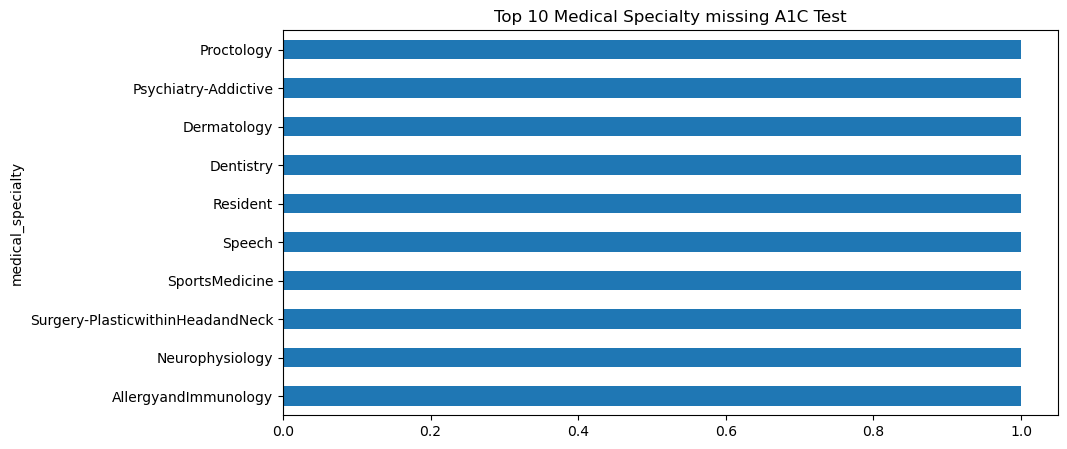

In [50]:
alc_test_gap.head(10).plot(kind='barh', figsize=(10,5), title = 'Top 10 Medical Specialty missing A1C Test')

<Axes: title={'center': 'Top 10 Medical Specialty missing Max Glucose Serum Test'}, ylabel='medical_specialty'>

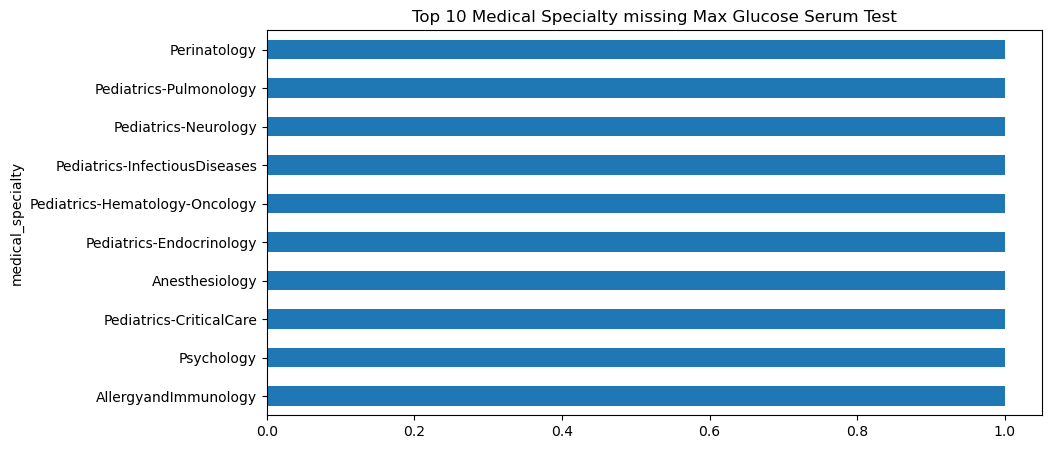

In [51]:
glu_test_gap.head(10).plot(kind='barh', figsize=(10,5), title = 'Top 10 Medical Specialty missing Max Glucose Serum Test')

In [52]:
# Patients with no A1C test and readmitted <30
readmit_no_a1c = df[(df['A1Cresult'].isin(['No Test'])) & (df['readmitted'] == '<30')]

readmit_rate_no_a1c = readmit_no_a1c['medical_specialty'].value_counts() / alc_missing['medical_specialty'].value_counts()
readmit_rate_no_a1c.dropna().sort_values(ascending=False).head(10)

medical_specialty
Resident                          0.500000
AllergyandImmunology              0.428571
Pediatrics-Pulmonology            0.333333
Pediatrics-Hematology-Oncology    0.333333
Hematology                        0.324324
InfectiousDiseases                0.275862
Psychiatry-Child/Adolescent       0.250000
Rheumatology                      0.214286
PhysicianNotFound                 0.200000
Cardiology-Pediatric              0.200000
Name: count, dtype: float64

In [53]:
df['time_in_hospital']

0          1
1          3
2          2
3          2
4          1
          ..
101761     3
101762     5
101763     1
101764    10
101765     6
Name: time_in_hospital, Length: 101766, dtype: int64

## Exploring the Relationship between the Combination of medications and readmissions 

In [54]:
# Full medication list
med_columns = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide',
    'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone'
]

# Create med_combo column for all patients
df['med_combo'] = df[med_columns].apply(
    lambda row: ', '.join([
        med for med in med_columns if row[med].lower() in ['up', 'down', 'steady']
    ]),
    axis=1
)

# Optional: Replace empty combos with 'No active meds'
df['med_combo'] = df['med_combo'].replace('', 'No active meds')



print(df[['readmitted', 'med_combo']].head())


  readmitted           med_combo
0         NO      No active meds
1        >30             insulin
2         NO           glipizide
3         NO             insulin
4         NO  glipizide, insulin


In [55]:
# Group medication combo and Readmission status 

med_combo_counts = df.groupby(['med_combo', 'readmitted']).size().reset_index(name='count')

In [56]:
df.to_csv('diabetes_readmission_update.csv', index= False)

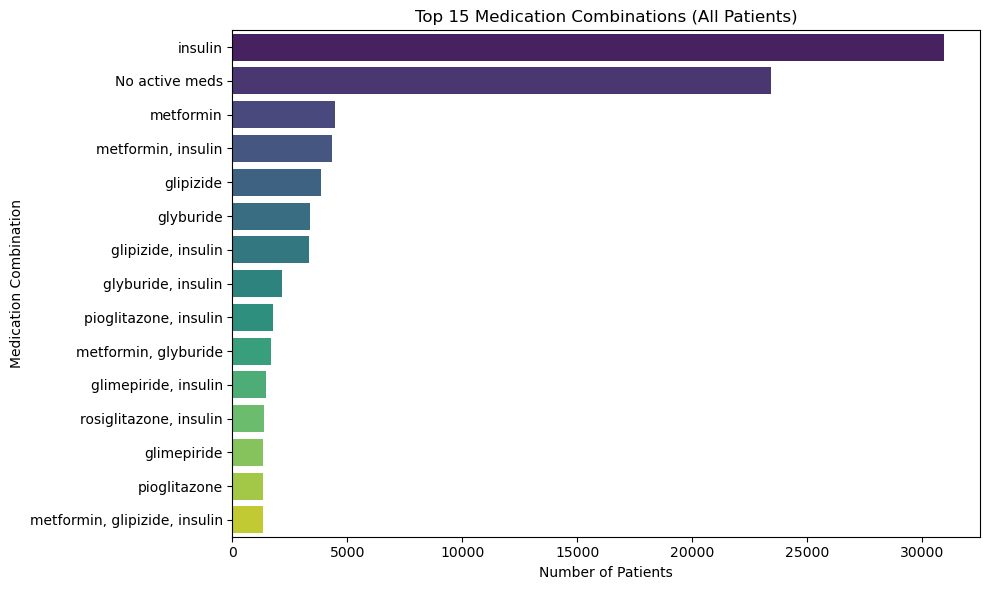

In [57]:
# Visualization — Top 15 combinations that appear most often
top_combos = (
    med_combo_counts.groupby('med_combo')['count']
    .sum()
    .reset_index()
    .sort_values('count', ascending=False)
    .head(15)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_combos, x='count', y='med_combo', palette='viridis')
plt.title("Top 15 Medication Combinations (All Patients)")
plt.xlabel("Number of Patients")
plt.ylabel("Medication Combination")
plt.tight_layout()
plt.show()


# Lets explore the medication vs readmission 

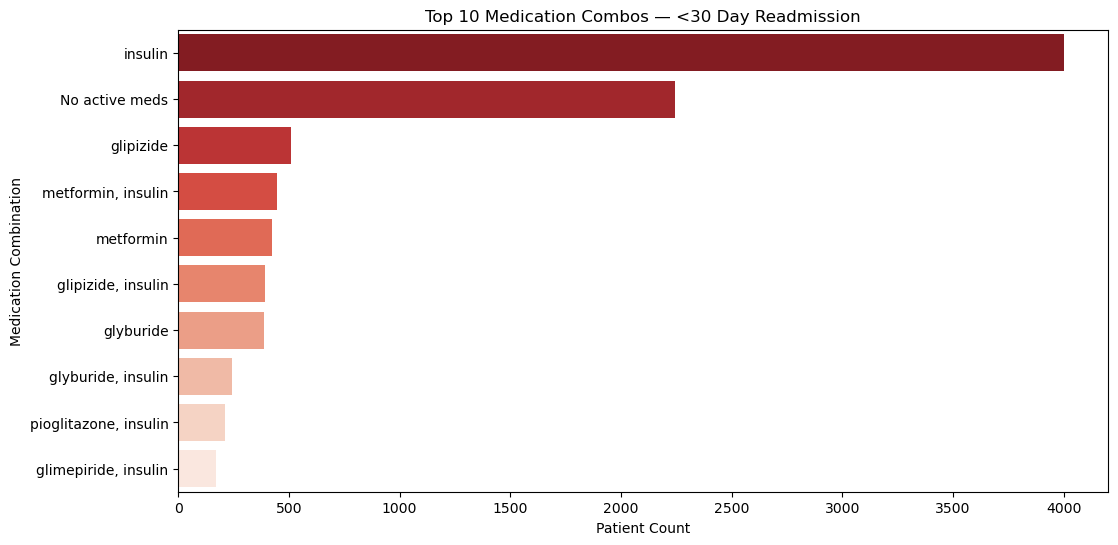

In [58]:
# Group by medication combo and readmission status
med_combo_counts = (
    df.groupby(['med_combo', 'readmitted'])
    .size()
    .reset_index(name='count')
)

# Top 10 combos for <30 readmission
top_readmit = (
    med_combo_counts[med_combo_counts['readmitted'] == '<30']
    .sort_values('count', ascending=False)
    .head(10)
)

# Top 10 combos for No readmission
top_no_readmit = (
    med_combo_counts[med_combo_counts['readmitted'] == 'NO']
    .sort_values('count', ascending=False)
    .head(10)
)

# plot <30 days 

plt.figure(figsize=(12,6))
sns.barplot(data=top_readmit, x='count', y='med_combo', palette='Reds_r')
plt.title("Top 10 Medication Combos — <30 Day Readmission")
plt.xlabel("Patient Count")
plt.ylabel("Medication Combination")
plt.show()

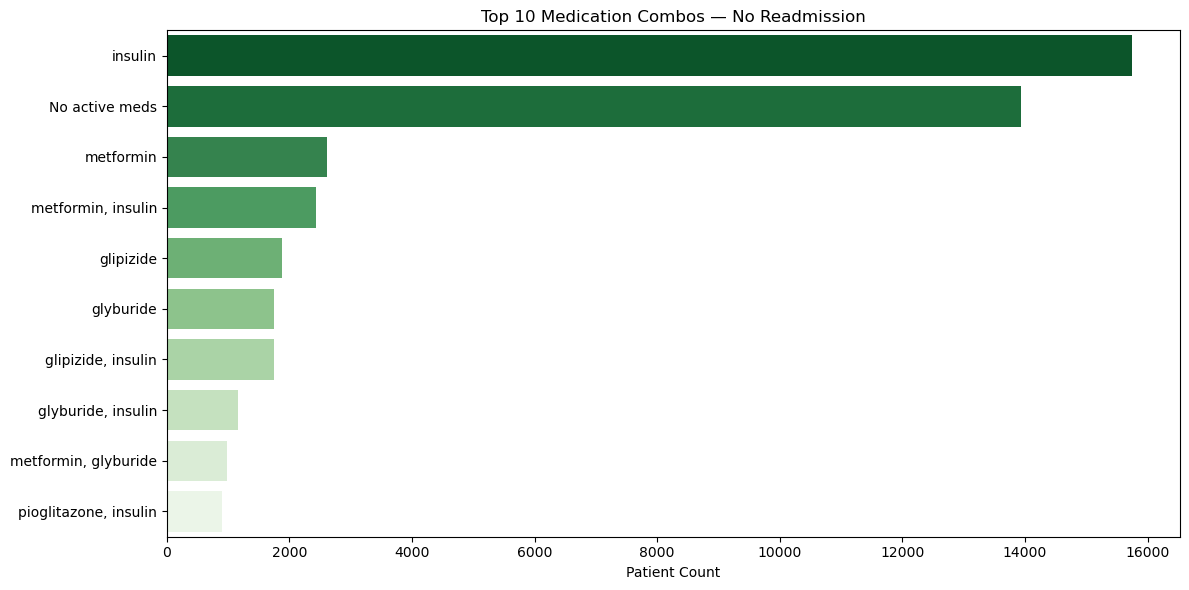

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_no_readmit, x='count', y='med_combo', palette='Greens_r')
plt.title("Top 10 Medication Combos — No Readmission")
plt.xlabel("Patient Count")
plt.ylabel("")
plt.tight_layout()
plt.show()

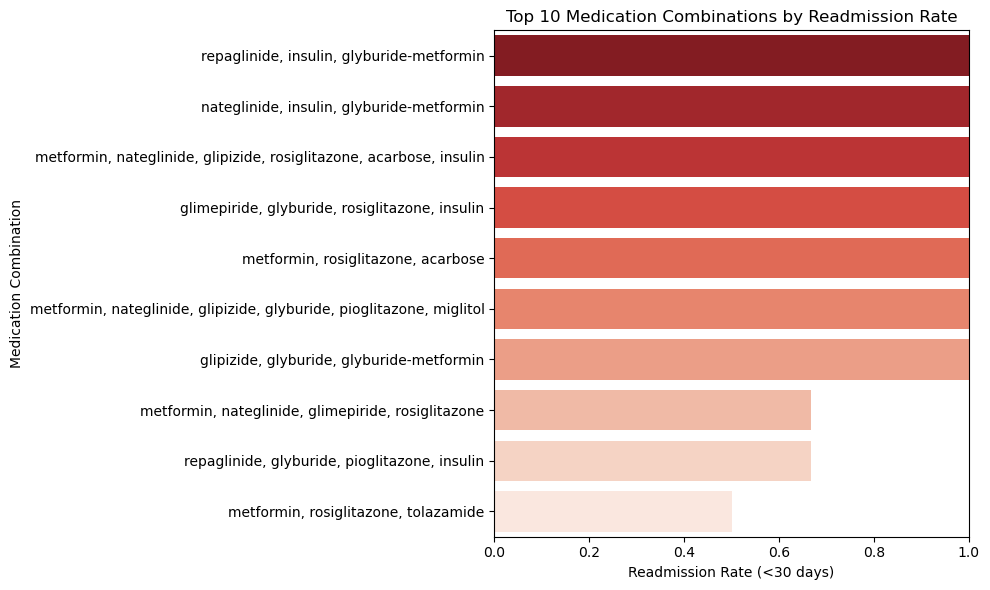

In [60]:

# Group by med combo and readmission status
combo_stats = df.groupby(['med_combo', 'readmitted']).size().reset_index(name='count')

# Pivot so each combo has counts for each readmission category
combo_pivot = combo_stats.pivot(index='med_combo', columns='readmitted', values='count').fillna(0)

# Calculate total patients per combo
combo_pivot['total'] = combo_pivot.sum(axis=1)

# Calculate readmission rate (<30 days)
combo_pivot['readmit_rate'] = combo_pivot['<30'] / combo_pivot['total']

# Sort by highest readmission rate
top_rate_combos = combo_pivot.sort_values('readmit_rate', ascending=False).head(10).reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rate_combos, x='readmit_rate', y='med_combo', palette='Reds_r')
plt.xlabel("Readmission Rate (<30 days)")
plt.ylabel("Medication Combination")
plt.title("Top 10 Medication Combinations by Readmission Rate")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [61]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,change,diabetesMed,readmitted,readmit_binary,diagnosis_category,diag_2_num,diag_3_num,diag_2_category,diag_3_category,med_combo
0,2278392,8222157,Caucasian,Female,[0-10),Unknown,6,25,1,1,...,No,No,NO,0,Other,NaN,NaN,Unknown,Unknown,No active meds
1,149190,55629189,Caucasian,Female,[10-20),Unknown,1,1,7,3,...,Ch,Yes,>30,0,Other,250.01,255.0,Other,Other,insulin
2,64410,86047875,AfricanAmerican,Female,[20-30),Unknown,1,1,7,2,...,No,Yes,NO,0,Other,250.00,NaN,Diabetes,Unknown,glipizide
3,500364,82442376,Caucasian,Male,[30-40),Unknown,1,1,7,2,...,Ch,Yes,NO,0,Other,250.43,403.0,Other,Circulatory,insulin
4,16680,42519267,Caucasian,Male,[40-50),Unknown,1,1,7,1,...,Ch,Yes,NO,0,Neoplasm,157.00,250.0,Neoplasm,Diabetes,"glipizide, insulin"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),Unknown,1,3,7,3,...,Ch,Yes,>30,0,Other,291.00,458.0,Other,Circulatory,"metformin, insulin"
101762,443847782,74694222,AfricanAmerican,Female,[80-90),Unknown,1,4,5,5,...,No,Yes,NO,0,Disgestive,276.00,787.0,Other,Disgestive,insulin
101763,443854148,41088789,Caucasian,Male,[70-80),Unknown,1,1,7,1,...,Ch,Yes,NO,0,Other,590.00,296.0,Genitourinary,Other,"metformin, insulin"
101764,443857166,31693671,Caucasian,Female,[80-90),Unknown,2,3,7,10,...,Ch,Yes,NO,0,Injury,285.00,998.0,Other,Injury,"glipizide, pioglitazone, insulin"


Confusion Matrix:
[[27090    15]
 [ 3424     1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27105
           1       0.06      0.00      0.00      3425

    accuracy                           0.89     30530
   macro avg       0.48      0.50      0.47     30530
weighted avg       0.80      0.89      0.83     30530


Top 15 Medication Features Driving Readmission:
                 Feature  Importance
29            insulin:No    0.053341
28          insulin:Down    0.051656
30        insulin:Steady    0.047017
49       pioglitazone:No    0.044912
57      rosiglitazone:No    0.041688
58  rosiglitazone:Steady    0.040908
50   pioglitazone:Steady    0.038390
17          glipizide:No    0.038318
37          metformin:No    0.037899
18      glipizide:Steady    0.036833
31            insulin:Up    0.035574
25          glyburide:No    0.035341
38      metformin:Steady    0.033713
26      glyburide:Steady    0.032

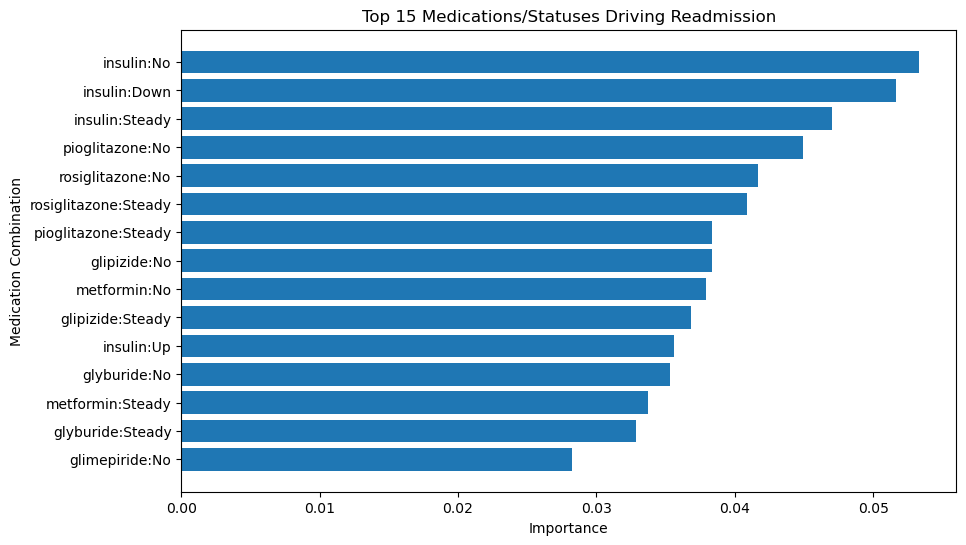

In [62]:
df['med_combo_list'] = df[med_columns].apply(
    lambda row: [f"{med}:{row[med]}" for med in med_columns],
    axis=1
)

# 4. One-hot encode the medication combinations
mlb = MultiLabelBinarizer()
med_features = pd.DataFrame(mlb.fit_transform(df['med_combo_list']),
                             columns=mlb.classes_,
                             index=df.index)

# 5. Combine with other important numerical features (optional, avoids bias from unrelated cols)
features = pd.concat([med_features], axis=1)

# 6. Target variable
y = df['readmit_binary']  # 1 = readmitted <30 days, 0 = no

# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

# 8. Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# 9. Predictions
y_pred = rf_model.predict(X_test)

# 10. Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 11. Feature importance (top 15)
importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(15)

print("\nTop 15 Medication Features Driving Readmission:")
print(importances)

# 12. Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Medication Combination')
plt.title('Top 15 Medications/Statuses Driving Readmission')
plt.gca().invert_yaxis()
plt.show()